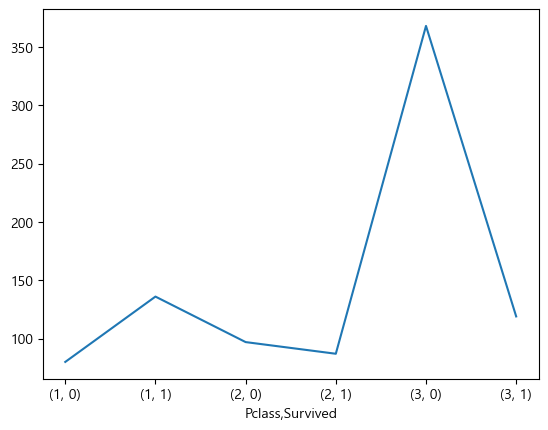

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. titanic.csv 파일 읽음
titanic = pd.read_csv('titanic.csv')

# 2. Pclass와 Survived를 멀티인덱스로 그룹화 후 각 데이터프레임의 데이터 개수 저장
# size는 결측치도 포함하기 때문에 결측치가 포함된 데이터 프레임일 땐 생각을 해야함
# groupby한 데이터는 g라고 표시해주는게 가독성에 좋음
g_pclass_survived = titanic.groupby(['Pclass', 'Survived']).size()

# 3. 한글 사용을 위해 plt의 font를 Malgun Gothic으로 설정
# plt.rcParams['font.family']='Malgun Gothic'
plt.rc('font', family='Malgun Gothic')
plt.rc('font', size=10)
plt.rc('axes', titlesize=13) 

# 4. subplots메소드를 이용해 차트를 1행 3열의 공간으로 나눔
# fig, ax = plt.subplots(1,3)

# 차트의 크기를 증가
fig.set_size_inches(10,5)

# 인수로 사용할 변수 저장
labels=['사망자', '생존자']
colors=['#abcdef', '#fedcba']

# 5-1. 그룹화한 등실별 생존, 사망자 비율을 원형 그래프로 시각화
# ax[0].pie(pclass_survived[1],
#           autopct='%.0f%%',
#           explode=[0.1, 0],
#           labels=labels,
#           colors=colors,
#           counterclock=False,)
# ax[0].set_title('1등실')

# ax[1].pie(pclass_survived[2],
#           autopct='%.0f%%',
#           explode=[0.1, 0],
#           labels=labels,
#           colors=colors,
#           counterclock=False,)
# ax[1].set_title('2등실')

# ax[2].pie(pclass_survived[3],
#            autopct='%.0f%%',
#            explode=[0.1, 0],
#            labels=labels,
#            colors=colors,
#            counterclock=False,)
# ax[2].set_title('3등실')

# 5-2. 반복문을 통해 원형 그래프 그리기
# for idx in range(0,3):
#     ax[idx].pie(g_pclass_survived[idx+1],
#           autopct='%.0f%%',
#           explode=[0.1, 0],
#           labels=labels,
#           colors=colors,
#           counterclock=False,)
#     ax[idx].set_title(f'{idx+1}등실')

# 5-3. DataFrame을 시각화
g_pclass_survived_unstack = g_pclass_survived.unstack()

g_pclass_survived_unstack.T.plot( # T : transpose메소드를 저장한 참조변수
    kind='pie',
    title=['1등실', '2등실', '3등실'],
    subplots=True,
    figsize=(10, 10),
    legend=False,
    ylabel='',
    autopct='%.0f%%',
    counterclock=False,
    labels=['사망자', '생존자'],
    colors=['#abcdef', '#fedcba'],
    explode=[0, 0.1],
    shadow=True,
)

# plt.show()

# 6. 차트를 png 파일로 저장, 인치 별 점의 수를 150으로 설정
plt.savefig('등실별 생존 사망 비율.png', dpi=150)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

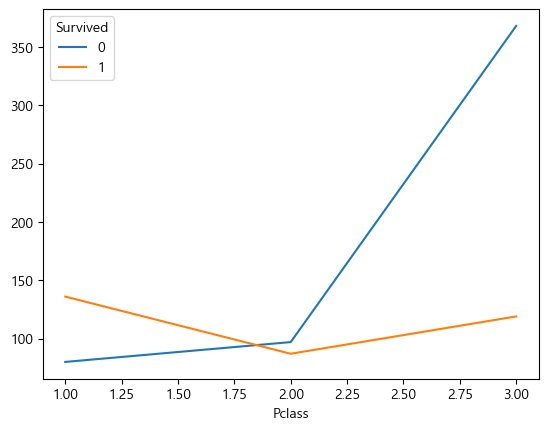

In [23]:
help(pd.DataFrame().plot)

In [16]:
# 행의 합 : 같은 열에 값의 합
g_pclass_survived_unstack = g_pclass_survived.unstack()
g_pclass_survived_unstack.sum()

# 열의 합 : 같은 행에 있는 값의 합
g_pclass_survived_unstack.sum(axis=1)

# 열의 합 추가
g_pclass_survived_unstack['합'] = g_pclass_survived_unstack.sum(axis=1)
g_pclass_survived_unstack

Survived,0,1,합
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487


In [12]:
# 사망자 비율 추가
g_pclass_survived_unstack['사망자 비율'] = g_pclass_survived_unstack[0] / g_pclass_survived_unstack.합
g_pclass_survived_unstack

Survived,0,1,합,사망자 비율
Pclass,,,,
1,80,136,216,0.370370
2,97,87,184,0.527174
3,368,119,487,0.755647


In [14]:
# 생존자 비율 추가
g_pclass_survived_unstack['생존자 비율'] = g_pclass_survived_unstack[1] / g_pclass_survived_unstack.합
g_pclass_survived_unstack

Survived,0,1,합,사망자 비율,생존자 비율
Pclass,,,,,
1,80,136,216,0.370370,0.629630
2,97,87,184,0.527174,0.472826
3,368,119,487,0.755647,0.244353


- 가설2. 1등실 승객의 생존율이 가장 높을 것이다
    - 승객 총 887명 
        - 1등실 인원 216명 : 생존자 136명(약 63%)
        - 2등실 인원 184명 : 생존자 87명(약 47%)
        - 3등실 인원 487명 : 생존자 119명(약 24%)
        
    - 생존율이 가장 높은 등실은 약 63%로 1등실 승객이 가장 높고, 다음으로 약 47%인 2등실, 마지막으로 약 24%인 3등실 순이었다.